In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
config = {
    "MIN_WAIT_TIME" : 30,
    "INPUT_PATH" : "./raw_data/data_all.csv",
    "TIME_HEADER" : "Time",
    "PRICE_HEADER" : "Price"
}

In [3]:
data = pandas.read_csv(config["INPUT_PATH"])

### Inspect the data

In [4]:
print(data.head())

   Time   Price
0     0  1.2546
1     1  1.2567
2     2  1.2577
3     3  1.2579
4     4  1.2593


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 2 columns):
Time     65000 non-null int64
Price    65000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1015.7 KB
None


In [6]:
print(data.describe())

               Time         Price
count  65000.000000  65000.000000
mean   32499.500000      1.248913
std    18764.028086      0.119757
min        0.000000      1.035550
25%    16249.750000      1.131510
50%    32499.500000      1.258255
75%    48749.250000      1.350960
max    64999.000000      1.514210


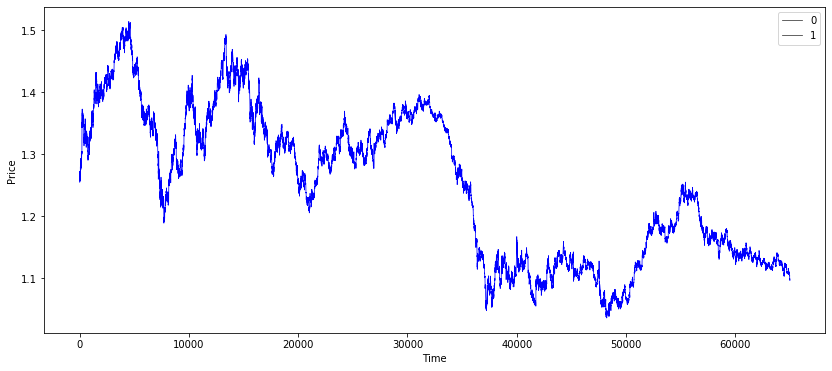

In [7]:
plt.figure(figsize=(14, 6))
seaborn.lineplot(data=data, 
                    x="Time", 
                    y="Price", 
                    size=1,
                    color="blue",
                    linewidth=0)

### Solution 1

In [8]:
maximum_index = max(data.index)
current_index = min(data.index)
# Reset the trade log
trade_log = [] 

while (True):
    
    # Condition to continue trading if there is enough time remaining to close out
    if ((maximum_index - current_index) <= config["MIN_WAIT_TIME"]):
        # Exit the whole process if there is less than 30 time units remaining
        break
        
    else:
        # First store the current price, future price and future index
        current_price = data[config["PRICE_HEADER"]][current_index]
        future_index = current_index + config["MIN_WAIT_TIME"]
        future_price = data[config["PRICE_HEADER"]][future_index]
        
        # If there is opportunity for arbitrage store the trade and increment current index by 30 + 1
        if (future_price > current_price):
            
            one_trade = {
                "OPEN_INDEX": current_index,
                "OPEN_PRICE": current_price,
                "CLOSE_INDEX": future_index,
                "CLOSE_PRICE": future_price,
                "PROFIT": future_price - current_price }
            
            # Push trade data to trade log 
            trade_log.append(one_trade)
            
            current_index = future_index + 1
            
        else:
        # Otherwise if no profit can be made move onto the next index and repeat
            current_index = current_index + 1

### Calculate and print results

In [9]:
total_profit = sum([trade['PROFIT'] for trade in trade_log])
total_trades = len(trade_log)
print(f'Total Profit: {total_profit}\n\nTotal Trades: {total_trades} trades\n\nTrade log summary: \n\n{trade_log}')

Total Profit: 5.548470000000016

Total Trades: 1547 trades

Trade log summary: 

[{'OPEN_INDEX': 0, 'OPEN_PRICE': 1.2546, 'CLOSE_INDEX': 30, 'CLOSE_PRICE': 1.2636, 'PROFIT': 0.009000000000000119}, {'OPEN_INDEX': 31, 'OPEN_PRICE': 1.2617, 'CLOSE_INDEX': 61, 'CLOSE_PRICE': 1.2751, 'PROFIT': 0.013399999999999856}, {'OPEN_INDEX': 62, 'OPEN_PRICE': 1.2741, 'CLOSE_INDEX': 92, 'CLOSE_PRICE': 1.2823, 'PROFIT': 0.008199999999999985}, {'OPEN_INDEX': 93, 'OPEN_PRICE': 1.2804, 'CLOSE_INDEX': 123, 'CLOSE_PRICE': 1.29, 'PROFIT': 0.009600000000000053}, {'OPEN_INDEX': 124, 'OPEN_PRICE': 1.2882, 'CLOSE_INDEX': 154, 'CLOSE_PRICE': 1.3027, 'PROFIT': 0.014499999999999957}, {'OPEN_INDEX': 155, 'OPEN_PRICE': 1.3007, 'CLOSE_INDEX': 185, 'CLOSE_PRICE': 1.3015, 'PROFIT': 0.0008000000000001339}, {'OPEN_INDEX': 186, 'OPEN_PRICE': 1.3015, 'CLOSE_INDEX': 216, 'CLOSE_PRICE': 1.3453, 'PROFIT': 0.04379999999999984}, {'OPEN_INDEX': 217, 'OPEN_PRICE': 1.3455, 'CLOSE_INDEX': 247, 'CLOSE_PRICE': 1.3574, 'PROFIT': 0.01190

### Solution 2
Added an additional step to optimize for future index

In [10]:
maximum_index = max(data.index)
current_index = min(data.index)
# Reset the trade log
trade_log = [] 

while (True):
    
    # Condition to continue trading if there is enough time remaining to close out
    if ((maximum_index - current_index) <= config["MIN_WAIT_TIME"]):
        # Exit the whole process if there is less than 30 time units remaining
        break
        
    else:
        # First store the current price, future price and future index
        current_price = data[config["PRICE_HEADER"]][current_index]
        future_index = current_index + config["MIN_WAIT_TIME"]
        
        # Optimize for highest value future index
        while ((data[config["PRICE_HEADER"]][future_index] < data[config["PRICE_HEADER"]][future_index + 1]) \
              and ((future_index + 1) <= maximum_index)):
            future_index = future_index + 1
        
        future_price = data[config["PRICE_HEADER"]][future_index]
        
        
        # If there is opportunity for arbitrage store the trade and increment current index by 30 + 1
        if (future_price > current_price):
            
            one_trade = {
                "OPEN_INDEX": current_index,
                "OPEN_PRICE": current_price,
                "CLOSE_INDEX": future_index,
                "CLOSE_PRICE": future_price,
                "PROFIT": future_price - current_price }
            
            # Push trade data to trade log 
            trade_log.append(one_trade)
            
            current_index = future_index + 1
            
        else:
        # Otherwise if no profit can be made move onto the next index and repeat
            current_index = current_index + 1

### Calculate and print results

In [11]:
total_profit = sum([trade['PROFIT'] for trade in trade_log])
total_trades = len(trade_log)
print(f'Total Profit: {total_profit}\n\nTotal Trades: {total_trades} trades\n\nTrade log summary: \n\n{trade_log}')

Total Profit: 6.546489999999997

Total Trades: 1541 trades

Trade log summary: 

[{'OPEN_INDEX': 0, 'OPEN_PRICE': 1.2546, 'CLOSE_INDEX': 30, 'CLOSE_PRICE': 1.2636, 'PROFIT': 0.009000000000000119}, {'OPEN_INDEX': 31, 'OPEN_PRICE': 1.2617, 'CLOSE_INDEX': 61, 'CLOSE_PRICE': 1.2751, 'PROFIT': 0.013399999999999856}, {'OPEN_INDEX': 62, 'OPEN_PRICE': 1.2741, 'CLOSE_INDEX': 92, 'CLOSE_PRICE': 1.2823, 'PROFIT': 0.008199999999999985}, {'OPEN_INDEX': 93, 'OPEN_PRICE': 1.2804, 'CLOSE_INDEX': 123, 'CLOSE_PRICE': 1.29, 'PROFIT': 0.009600000000000053}, {'OPEN_INDEX': 124, 'OPEN_PRICE': 1.2882, 'CLOSE_INDEX': 154, 'CLOSE_PRICE': 1.3027, 'PROFIT': 0.014499999999999957}, {'OPEN_INDEX': 155, 'OPEN_PRICE': 1.3007, 'CLOSE_INDEX': 185, 'CLOSE_PRICE': 1.3015, 'PROFIT': 0.0008000000000001339}, {'OPEN_INDEX': 186, 'OPEN_PRICE': 1.3015, 'CLOSE_INDEX': 217, 'CLOSE_PRICE': 1.3455, 'PROFIT': 0.04399999999999982}, {'OPEN_INDEX': 218, 'OPEN_PRICE': 1.3453, 'CLOSE_INDEX': 250, 'CLOSE_PRICE': 1.3613600000000001, 'PROF